# UCL 20 Newsgroup Dataset

In this dataset we are given 20 categories and their are certain number of articles pertaining to a particular category .
- - - 
Our job is to classify the text docs. according to their category

In [1]:
#importing basic helper modules
import numpy as np
import pandas as pd
import os
import time

#start time 
start = time.time()

In [2]:
#import stopwords from nltk
from nltk.corpus import stopwords
#loading stopwords
stop = stopwords.words('english')

In [3]:
# a set of block words based on our initial look of data
block_words = ['newsgroups', 'xref', 'path', 'from', 'subject', 'sender', 'organisation', 'apr','gmt', 'last','better','never','every','even','two','good','used','first','need','going','must','really','might','well','without','made','give','look','try','far','less','seem','new','make','many','way','since','using','take','help','thanks','send','free','may','see','much','want','find','would','one','like','get','use','also','could','say','us','go','please','said','set','got','sure','come','lot','seems','able','anything','put', '--', '|>', '>>', '93', 'xref', 'cantaloupe.srv.cs.cmu.edu', '20', '16', "max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'", '21', '19', '10', '17', '24', 'reply-to:', 'thu', 'nntp-posting-host:', 're:','25''18'"i'd"'>i''22''fri,''23''>the','references:','xref:','sender:','writes:','1993','organization:','path:']

In [6]:
#constructing a list of folders in datset
directory = [f for f in os.listdir('./20_newsgroups') if not f.startswith('.')]
directory
#list of all the folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Constructing our vocabulary

lets form a dictionary for containing all the words in all the docs. in all directories as keys and their frequency as occurences

In [19]:
#initialize the dictionary
vocab = {}
#traverse through each directory 
for i in range(len(directory)):
    #create a list of files(a.ka. text documents) in particular directory
    files = os.listdir('./20_newsgroups/'+directory[i])
    #traverse through each file
    for j in range(len(files)):
        #path of each file
        path = './20_newsgroups/'+directory[i]+ '/' +files[j]
        #open the file and read it
        #text stores all words for a particular doucment in a particular directory
        text = open(path,'r',errors='ignore').read()
        #text.split() splits the text document in a list of words seprated by space
        #traverse for each word in the list
        for word in text.split():
            #check the length of word
            if len(word) != 1:
                #check if the word belong to stopword or blockword
                if not word.lower() in stop:
                        if not word.lower() in block_words:
                            #if word is already in dictionary then increase the count by one
                            #else initialise
                            #get function returns basically the value of corresponding key
                            if vocab.get(word.lower()) != None:
                            #already present
                                vocab[word.lower()] +=1
                            else:
                                vocab[word.lower()]=1

In [20]:
#our vocabulary dictionary
vocab

{'alt.atheism:49960': 1,
 'alt.atheism.moderated:713': 1,
 'news.answers:7054': 1,
 'alt.answers:126': 1,
 'cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew': 1,
 'from:': 20417,
 'mathew': 201,
 '<mathew@mantis.co.uk>': 120,
 'newsgroups:': 20081,
 'alt.atheism,alt.atheism.moderated,news.answers,alt.answers': 7,
 'subject:': 20486,
 'alt.atheism': 863,
 'faq:': 45,
 'atheist': 213,
 'resources': 307,
 'summary:': 705,
 'books,': 138,
 'addresses,': 30,
 'music': 201,
 'related': 491,
 'atheism': 216,
 'keywords:': 1517,
 'faq,': 85,
 'atheism,': 49,
 'music,': 29,
 'fiction,': 21,
 'contacts': 62,
 'message-id:': 20050,
 '<19930329115719@mantis.co.uk>': 2,
 'date:': 20137,
 'mon,': 1690,
 '29': 925,
 'mar': 107,
 '11:57:19': 3,
 'expires:': 152,
 'thu,': 1883,
 'followup-to:': 1413,
 'distribution:': 4406,
 'world': 3602,
 'mantis'

In [21]:
#we need to sort this vocabulary and then select the best 2000 features
#we need operator module to sort the dictionary
import operator
sorted_vocab = sorted(vocab.items(), key = operator.itemgetter(1),reverse = True)
#this is in format of list of tuples

#dictionary containing most occuring k-words
kvocab = {}
#frequency of 2000th most occured word
z = sorted_vocab[2000][1]
for x in sorted_vocab:
    #assigning the word feature with its frequency a.k.a -> converting back to dictionary
    kvocab[x[0]] = x[1]
    #creating basically a flag so as to where to stop so that 
    if x[1] <= z:
        break

In [22]:
#best 2000 features
print(len(kvocab))
print(kvocab)

2000
{'subject:': 20486, 'from:': 20417, 'date:': 20137, 'newsgroups:': 20081, 'message-id:': 20050, 'lines:': 20042, 'article': 12108, 'people': 8415, 'university': 8203, 'know': 7695, 'think': 7205, "i'm": 5823, 'distribution:': 4406, 'time': 4336, 'it.': 4185, 'anyone': 3976, 'world': 3602, 'right': 3326, 'believe': 3308, 'still': 3290, 'something': 3190, 'computer': 3157, 'system': 3137, "i've": 3114, 'god': 2881, '15': 2881, 'back': 2840, "can't": 2836, 'news': 2836, 'state': 2787, 'work': 2692, 'someone': 2610, '>in': 2610, 'government': 2534, 'problem': 2528, '23': 2522, 'another': 2516, 'read': 2516, 'usa': 2496, 'information': 2480, '>the': 2452, 'number': 2424, "that's": 2382, 'things': 2378, 'part': 2323, 'fri,': 2307, 'point': 2297, 'little': 2294, '22': 2284, 'windows': 2265, '>i': 2253, 'tue,': 2241, 'file': 2208, 'data': 2155, 'question': 2126, 'probably': 2112, 'years': 2106, 'different': 2100, 'available': 2095, '(usenet': 2079, 'space': 2079, 'it,': 2073, 'around': 20

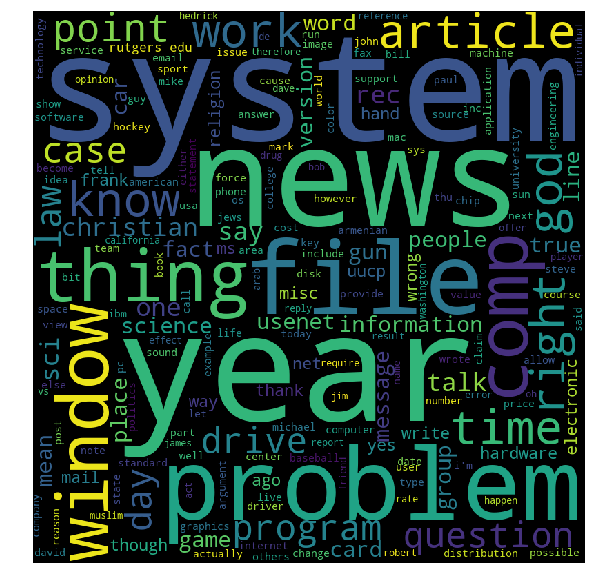

In [24]:
#making a wordcloud to visualize our features
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#to generate wordcloud u need a string of all the words u want to make a wordcloud of
comment_words=' '
#traversing through all the features
for words in list(kvocab.keys()):
    #storing each word in comment_words string
    comment_words = comment_words + words + ' '


#generating the wordcloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stop,
                min_font_size = 14).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show();

# Converting the dictionary into Dataframe

In [29]:
#a list of most common features
feature_list = list(kvocab.keys())
#creating a pandas dataframe with features as columns
df = pd.DataFrame(columns = feature_list)

#filling x_train values in dataframe
for i in range(len(directory)):
    #create a list of all files in a given directory
    files = os.listdir('./20_newsgroups/' + directory[i])
    
    #traverse through each file
    for j in range(len(files)):
        #insert a row at the end of dataframe with all zeros
        #this basically adds one new row of len(2000) with all zero at each iteration
        #this itertation continues till 19997 times(total files)
        #at each iteration all the features frequency values are stored for particular file
        df.loc[len(df)]=np.zeros(len(feature_list))
        #path of each file
        path = './20_newsgroups/'+directory[i]+'/'+files[j]
        #open file and read it
        #storing all text simmilarly
        text = open(path,'r',errors='ignore').read()
        #splitting the text by spaces forming words
        for word in text.split():
            #for each word check if it is in feature list and hence upadate value
            if word.lower() in feature_list:
                #len(df)-1 is done because indexing starts with 0
                df[word.lower()][len(df)-1]+=1


In [30]:
#making the x arrays containing frequency of features
x = df.values
#making a list of dataframe will help later in slef implementation
f_list = list(df)

In [33]:
## Creating  y array containing labels for classification 

y = []

for i in range(len(directory)):
    ##Create a list of files in the given dictionary 
    files = os.listdir('./20_newsgroups/' + directory[i])
 
    for j in range(len(files)):
        y.append(i)

y = np.array(y)
y.shape

(19997,)

In [34]:
#classes are labelled as 0-19 as there are 20 docs
y

array([ 0,  0,  0, ..., 19, 19, 19])

## Training and testing sklearn implementation

In [35]:
## Splitting the whole dataset for training and testing
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.25, random_state = 0)

In [36]:
#importing the classifer
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
#training of data
clf.fit(x_train, y_train)
#predicting
y_pred = clf.predict(x_test)

train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)

train_score, test_score

(0.8794425551777022, 0.8324)

## Self Implementation

In [37]:
def fit1(x_train, y_train):
    
    # dictionary containing the count of words
    count = {}
       
    # all unique classes 
    set_class = set(y_train)
    #traversing through all the docs. based on classes        
    for current_class in set_class:
        count[current_class] = {}
        count["total_data"] = len(y_train)
        
        #Rows whose class is current_class
        current_class_rows = (y_train == current_class)
        #only thoes datapoints that have current class as their y_train
        x_train_current = x_train[current_class_rows]
        y_train_current = y_train[current_class_rows]
        sums=0
        for i in range(len(f_list)):
            # For each class, calculating total frequency of a feature 
            count[current_class][f_list[i]] = x_train_current[:,i].sum()
            #total n0. of words for current class
            sums = sums + count[current_class][f_list[i]]
            
        # Calculating total count of words of a class
        count[current_class]["total_count"] = sums
        
    return count

In [38]:
def probability1(dictionary, row, current_class):
    ## class_prob = log of probability of the current class = log(no of documents having class as current_class)/ (total number of documents)
    class_prob = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    total_prob = class_prob
    
    
    for i in range(len(row)):
        ##Numerator
        word_count = dictionary[current_class][f_list[i]] + 1     
        ## Denominator
        total_count = dictionary[current_class]["total_count"] + len(f_list)
        ## Add 1 to numerator and len(row) in denominator for laplace correction
        
        ## Log Probabilty of a word 
        word_prob = np.log(word_count) - np.log(total_count)
        
        ##Calculating probability frequency number of times
        for j in range(int(row[i])):
            total_prob += word_prob
        
    return total_prob

In [39]:
def predictSinglePoint1(row, dictionary):
    classes = dictionary.keys()
    
    ##Initialising best_prob and best_class as very low count
    
    best_prob = -1000
    best_class = -1
    first_iter = True
    
    for current_class in classes:
        if(current_class == "total_data"):
            continue
        
        ##Calculating probabilty that the given row belong to current_class
        prob_current_class = probability1(dictionary, row, current_class)
        
        ##For first iteration we set the best_prob to be the probabilty that row is of first class and best_class to be first class
        ##For rest iteration, we check if the probabilty that row is of the current_class is greater than the best_prob then we update best_prob and best_class.
        if(first_iter or prob_current_class > best_prob):
            best_prob = prob_current_class
            best_class = current_class
        
        first_iter = False
    
    ## Return the best class which has maximum probabilty.
    return best_class

In [40]:
def predict1(x_test, dictionary):
    ## Initialise a list which contain the predictions
    y_pred_self = []
    
    ##Iterate through each row in x_test
    for j in range(len(x_test)):
        
        ##Calculate the prediction of the class to which the row belong to.
        pred_class = predictSinglePoint1(x_test[j,:], dictionary) 
        
        ##Append the predicted class to our list
        y_pred_self.append(pred_class)
    
    ##Return the list of predictions
    return y_pred_self

In [41]:
## Training the model 
dictionary = fit1(x_train, y_train)

##Testing the model 
y_pred_self = predict1(x_test, dictionary)

In [43]:
#accuracy metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
self_pred_score=accuracy_score(y_pred_self,y_test)


In [44]:
print("Classification report for sklearn MultinomialNB()",classification_report(y_test, y_pred))
print("Classification report for self-implemented Naive Bayes ",classification_report(y_test, y_pred_self))

Classification report for sklearn MultinomialNB()              precision    recall  f1-score   support

          0       0.71      0.78      0.75       233
          1       0.80      0.74      0.77       253
          2       0.80      0.87      0.83       249
          3       0.84      0.85      0.84       240
          4       0.84      0.89      0.86       236
          5       0.89      0.80      0.84       240
          6       0.76      0.86      0.81       261
          7       0.83      0.89      0.86       269
          8       0.81      0.94      0.87       284
          9       0.90      0.98      0.94       248
         10       0.96      0.94      0.95       231
         11       0.93      0.88      0.91       233
         12       0.83      0.86      0.85       244
         13       0.90      0.86      0.88       256
         14       0.89      0.89      0.89       246
         15       0.93      0.98      0.95       252
         16       0.74      0.84      0.78      

In [45]:
print("Confusion marix for sklearn MultinomialNB()",confusion_matrix(y_test, y_pred))
print("Confusion matrix for self-implemented Naive Bayes ",confusion_matrix(y_test, y_pred_self))

Confusion marix for sklearn MultinomialNB() [[182   1   0   1   0   0   0   2   8   0   1   0   0   1   1   2   2   1
    3  28]
 [  1 188  20   7   8   7   3   1   7   2   0   0   4   2   3   0   0   0
    0   0]
 [  0   8 216   5   1   7   3   1   2   1   0   1   2   0   2   0   0   0
    0   0]
 [  0   2   8 204   8   0  11   3   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   1   4   8 210   0   5   1   0   1   0   0   3   0   2   0   1   0
    0   0]
 [  0  16  10   3   4 191   3   0   5   1   0   1   5   0   1   0   0   0
    0   0]
 [  0   1   2   9   3   0 225   8   2   0   1   0   7   0   2   0   0   0
    1   0]
 [  0   1   0   0   3   2   9 240   7   0   0   0   3   0   1   0   0   0
    2   1]
 [  1   0   0   0   1   0   6   5 268   0   0   0   0   0   1   0   1   0
    1   0]
 [  0   0   0   0   0   0   3   0   0 242   2   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   1   1   1   2   5 217   0   0   0   0   1   0   0
    1   0]
 [  0   3   1   0   1

Thus both multinomial naive bayes and self implemented one are doing pretty good job performing nearly same on the testing data . There are classes like th 20th class in which both the classifiers get confused.